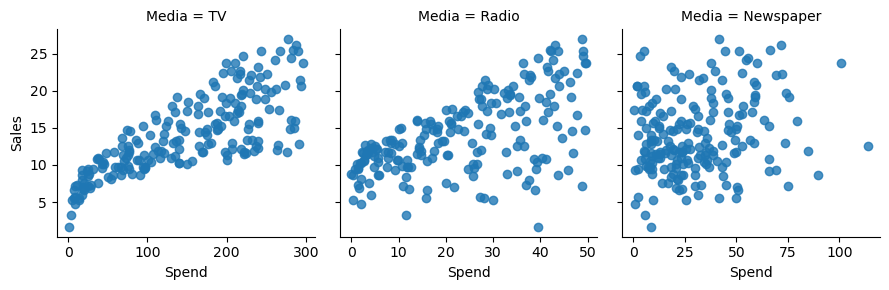

In [36]:
# NumPy and Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Matplotlib and Seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data about advertising spending
ads = pd.read_csv("advertising.csv", sep = ";")

# Representing in a grid the sales according to spending on each medium.
ads_m = ads.melt(id_vars='Sales', value_vars=['TV','Radio','Newspaper'], var_name='Media', value_name='Spend')
sns.FacetGrid(ads_m, col='Media', sharex=False).map(sns.regplot, 'Spend', 'Sales', fit_reg=False)

In [37]:
import statsmodels.api as sm

# Output vector
y = ads['Sales']

# Explicative variables matrix of the model
X = ads[['TV','Radio','Newspaper']]

# Adding the constant term to the model matrix (b0)
X = sm.add_constant(X, prepend=False)

# Construction of the model object using a linear model type OLS (Ordinary Least Squares)
model_mlin = sm.OLS(y, X)

# Adjusting the parameters of the model
mlin_fitted = model_mlin.fit()

# Summary of the adjusted model
print(mlin_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        11:40:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.0

Plot for visualizing the parcial relationship between the target variable and each explicative variable separately

eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 640x480 with 0 Axes>

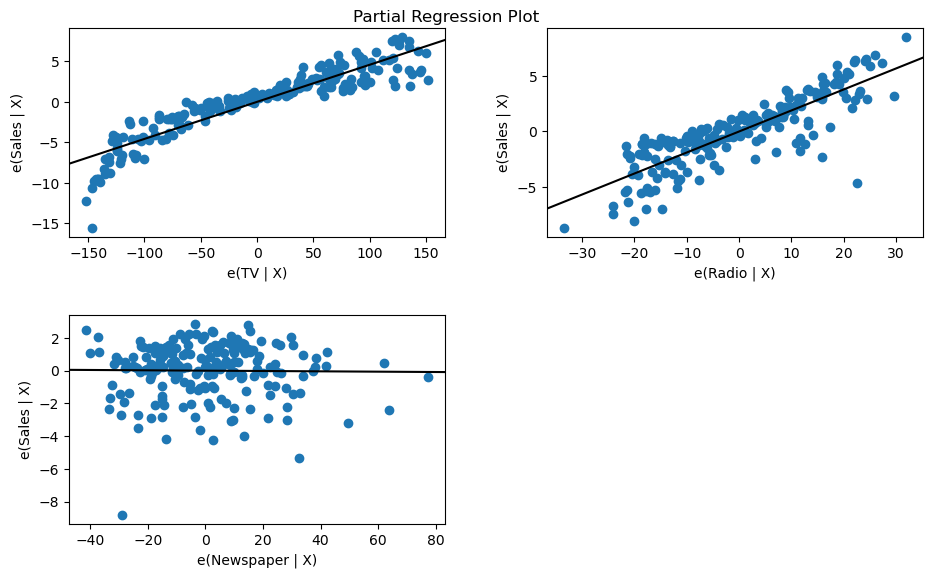

In [38]:
fig = plt.figure()
fig = sm.graphics.plot_partregress_grid(mlin_fitted, ['TV','Radio','Newspaper']).set_size_inches(10, 6)

<Figure size 640x480 with 0 Axes>

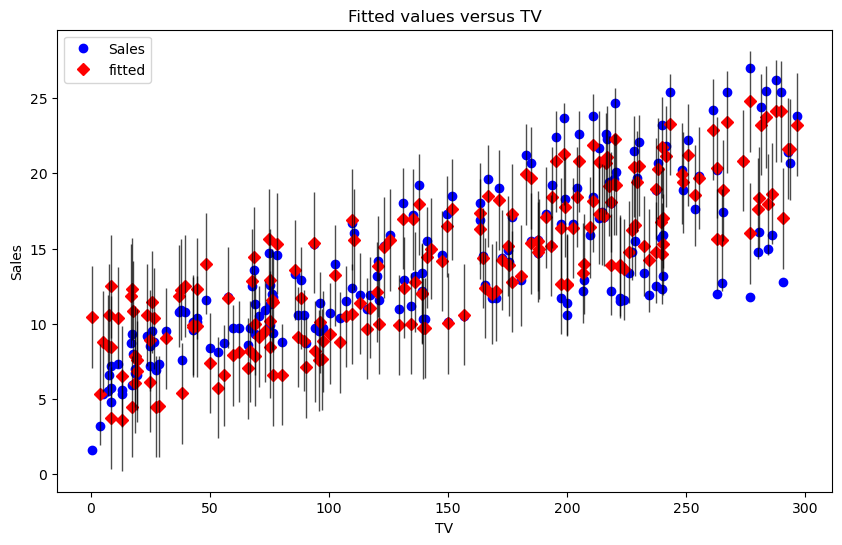

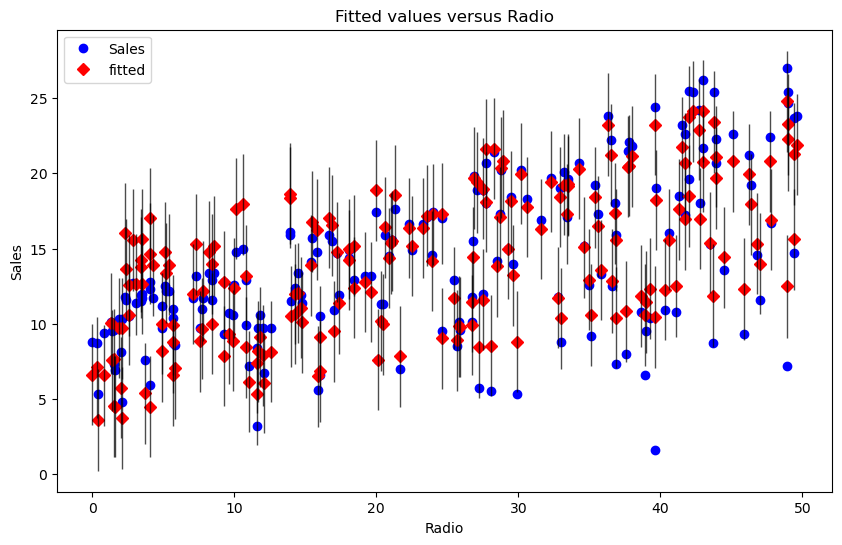

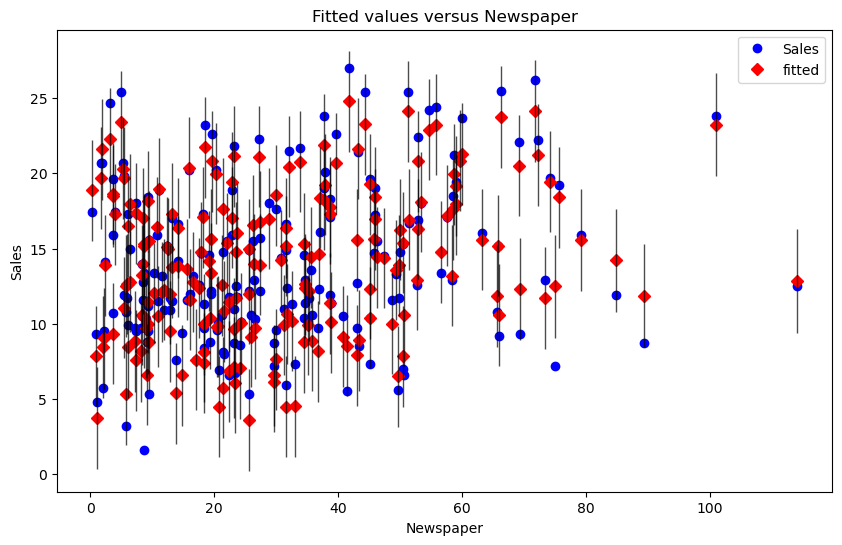

In [39]:
fig = plt.figure()
fig = sm.graphics.plot_fit(mlin_fitted, exog_idx=0).set_size_inches(10, 6)
fig = sm.graphics.plot_fit(mlin_fitted, exog_idx=1).set_size_inches(10, 6)
fig = sm.graphics.plot_fit(mlin_fitted, exog_idx=2).set_size_inches(10, 6)